In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# from IPython.core.display import display, HTML
# from shapely.geometry import Point

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
def extract_html_table(row):
    html = row["Description"]

    df = pd.read_html(html, index_col=0)[0]

    columns = pd.Series({
        "Street": df.loc["NAME"][0],
        "Folderpath": df.loc["FOLDERPATH"][0]
    })

    return pd.concat([
        row, columns
    ])

def plot_geojson(df, title, figsize=(5, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    df["geometry"].plot(ax=ax)
    plt.title(title)
    plt.show() 

In [4]:
coordinates = pd.read_csv('out/coordinates.csv', low_memory=False, lineterminator='\n')

geojson_raw = './data/national-map-line-geojson.geojson'
map_gpd = gpd.read_file(geojson_raw)

map_gpd = map_gpd.apply(extract_html_table, axis=1)
map_gpd = map_gpd.drop(columns=["Description"])

c1 = map_gpd["Folderpath"] == "Layers/Expressway"
c2 = map_gpd["Folderpath"] == "Layers/Major_Road"

map_clean = map_gpd[c1 | c2]

In [5]:
mrt_coordinates = coordinates[coordinates["type"] == "mrt"]

In [6]:
def plot_cluster(ax, label, cluster):
    coords, radius, color = cluster
    long, lat = coords

    circle = plt.Circle(
        (lat, long),
        radius,
        fill=True,
        ec="black",
        fc=color,
        linewidth=5,
        linestyle="-",
        alpha=0.5
    )

    ax.add_artist(circle)

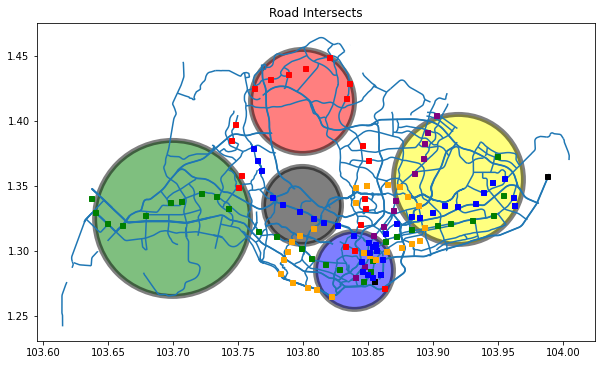

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
map_clean["geometry"].plot(ax=ax)

for i, row in mrt_coordinates.iterrows():
    latitude = row["latitude"]
    longitude = row["longitude"]

    code = row["station_code"]
    color = "black"

    if ("NS" in code):
        color = "red"
    elif ("CC" in code):
        color = "orange"
    elif ("DT" in code):
        color = "blue"
    elif ("EW" in code):
        color = "green"
    elif ("NE" in code):
        color = "purple"

    plt.plot(longitude, latitude, markersize = 5, color = color, marker = 's')

plot_cluster(ax, "north", [[1.4149, 103.7994], 0.04, "red"])
plot_cluster(ax, "west", [[1.3249, 103.6994], 0.06, "green"])
plot_cluster(ax, "central", [[1.3349, 103.7994], 0.03, "black"])
plot_cluster(ax, "east", [[1.3549, 103.9194], 0.05, "yellow"])
plot_cluster(ax, "south", [[1.2849, 103.8394], 0.03, "blue"])

plt.title("Road Intersects")
plt.show()